In [38]:
!pip install Sastrawi

In [39]:
from google.colab import files
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud
from nltk.util import ngrams
import matplotlib.pyplot as plt


In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
df = pd.read_excel("reviews_hotel.xlsx")

In [42]:
print("Jumlah total ulasan:", len(df))
print("\nContoh 5 data awal:")
display(df.head())

Jumlah total ulasan: 1216

Contoh 5 data awal:


,review
0,"Pelayanannya ramah bgtt, fasilitas kamar juga ..."
1,Baru kali ini sangat kecewa dengan pelayanan h...
2,Liburan menyenangkan di jogja\nStay di hotel y...
3,lokasinya juga mantap dekat dengan bandara dan...
4,Saya merekomendasikan anda untuk menginap di h...


**casefolding**

In [43]:
import re
def casefolding(teks):
    teks = teks.lower()
    teks = re.sub(r"http\S+|www\S+", "", teks)
    teks = re.sub(r"[^a-zA-Z\s]", " ", teks)
    teks = re.sub(r"\s+", " ", teks).strip()
    return teks

df["Casefold"] = df["review"].apply(casefolding)
df[["review", "Casefold"]].tail(10)


,review,Casefold
1206,The best pengalaman menginap dan semua makanan...,the best pengalaman menginap dan semua makanan...
1207,Lokasi hotel yang strategis untuk keperluan bi...,lokasi hotel yang strategis untuk keperluan bi...
1208,"Fasilitasnya luar biasa, dari kamar, pelayanan...",fasilitasnya luar biasa dari kamar pelayanan d...
1209,"lokasi di pusat kota sangat strategis, service...",lokasi di pusat kota sangat strategis services...
1210,"Makanannya enak, fasilitas lengkap, kamar cuku...",makanannya enak fasilitas lengkap kamar cukup ...
1211,Kalau bisa tiap lift ada pemandunya (guide) un...,kalau bisa tiap lift ada pemandunya guide untu...
1212,"Menu sarapan nya sangat lengkap, rasa nya juga...",menu sarapan nya sangat lengkap rasa nya juga ...
1213,"tempat renangnya bagus, di atas.\nmakanan okee...",tempat renangnya bagus di atas makanan okee ba...
1214,"Sangattt rekomended untuk kesini, makanannya e...",sangattt rekomended untuk kesini makanannya en...
1215,"Kamar bersih, nyaman, wifi lancar, Breakfast m...",kamar bersih nyaman wifi lancar breakfast menu...


**cleaning**

In [44]:
import string

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df['cleaned'] = df['Casefold'].apply(clean_text)
print("HASIL CLEANING (hapus tanda baca, angka, simbol):")
display(df[['Casefold', 'cleaned']].head())

HASIL CLEANING (hapus tanda baca, angka, simbol):


,Casefold,cleaned
0,pelayanannya ramah bgtt fasilitas kamar juga o...,pelayanannya ramah bgtt fasilitas kamar juga o...
1,baru kali ini sangat kecewa dengan pelayanan h...,baru kali ini sangat kecewa dengan pelayanan h...
2,liburan menyenangkan di jogja stay di hotel yg...,liburan menyenangkan di jogja stay di hotel yg...
3,lokasinya juga mantap dekat dengan bandara dan...,lokasinya juga mantap dekat dengan bandara dan...
4,saya merekomendasikan anda untuk menginap di h...,saya merekomendasikan anda untuk menginap di h...


**normalisasi**

In [45]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_factory = StopWordRemoverFactory()
stop_remover = stop_factory.create_stop_word_remover()

df["filtered"] = df["cleaned"].apply(lambda x: stop_remover.remove(x))
df[["cleaned","filtered"]]

,cleaned,filtered
0,pelayanannya ramah bgtt fasilitas kamar juga o...,pelayanannya ramah bgtt fasilitas kamar oke re...
1,baru kali ini sangat kecewa dengan pelayanan h...,baru kali sangat kecewa pelayanan hotel mercur...
2,liburan menyenangkan di jogja stay di hotel yg...,liburan menyenangkan jogja stay hotel yg luar ...
3,lokasinya juga mantap dekat dengan bandara dan...,lokasinya mantap dekat bandara tempat tempat w...
4,saya merekomendasikan anda untuk menginap di h...,merekomendasikan untuk menginap hotel pelayana...
...,...,...
1211,kalau bisa tiap lift ada pemandunya guide untu...,kalau tiap lift pemandunya guide para tamu but...
1212,menu sarapan nya sangat lengkap rasa nya juga ...,menu sarapan nya sangat lengkap rasa nya enak ...
1213,tempat renangnya bagus di atas makanan okee ba...,tempat renangnya bagus atas makanan okee bange...
1214,sangattt rekomended untuk kesini makanannya en...,sangattt rekomended kesini makanannya enak sta...


In [46]:
normalisasi = {
    'yg': 'yang', 'sy': 'saya', 'sdh': 'sudah', 'udh': 'sudah', 'dgn': 'dengan', 'dg': 'dengan', 'aja': 'saja', 'nih': 'ini', 'sih': '', 'sihh': '', 'nihh': 'ini', 'ajaa': 'saja', 'eh': '', 'ehh': '', 'ehhh': '',
    'dong': '', 'tp': 'tapi', 'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'knp': 'kenapa', 'trs': 'terus', 'bgt': 'sangat', 'nya': '', 'rp': 'rupiah', 'bgtt': 'sangat', 'bgttt': 'sangat', 'jgn': 'jangan',
    'bgtttt': 'sangat', 'sii': '', 'si': '', 'siii': '', 'sihh': '', 'sihhh': '', 'jg': 'juga', 'aj': 'saja', 'tpi': 'tapi', 'tuu': 'itu', 'tuuu': 'itu', 'tuhh': 'itu', 'jgnn': 'jangan',
    'loh': '', 'kok': '', 'lah': '', 'deh': '', 'kan': '', 'ya': 'ya', 'yaa': 'ya', 'yaaa': 'ya', 'kann': '', 'yh': 'ya', 'yhh': 'ya', 'yhhh': 'ya',
    'tuh': 'itu', 'pun': '', 'pd': 'pada', 'blm': 'belum', 'kl': 'kalau', 'klo': 'kalau', 'klu': 'kalau', 'utk': 'untuk', 'biar':'biar','mah': '', 'dehh': '', 'dehhh': ''
}

def normalize_text(text):
    words = text.split()
    new_words = [normalisasi.get(w, w) for w in words]
    return ' '.join(new_words)

df['normalized'] = df['filtered'].apply(normalize_text)
display(df.head())

,review,Casefold,cleaned,filtered,normalized
0,"Pelayanannya ramah bgtt, fasilitas kamar juga ...",pelayanannya ramah bgtt fasilitas kamar juga o...,pelayanannya ramah bgtt fasilitas kamar juga o...,pelayanannya ramah bgtt fasilitas kamar oke re...,pelayanannya ramah sangat fasilitas kamar oke ...
1,Baru kali ini sangat kecewa dengan pelayanan h...,baru kali ini sangat kecewa dengan pelayanan h...,baru kali ini sangat kecewa dengan pelayanan h...,baru kali sangat kecewa pelayanan hotel mercur...,baru kali sangat kecewa pelayanan hotel mercur...
2,Liburan menyenangkan di jogja\nStay di hotel y...,liburan menyenangkan di jogja stay di hotel yg...,liburan menyenangkan di jogja stay di hotel yg...,liburan menyenangkan jogja stay hotel yg luar ...,liburan menyenangkan jogja stay hotel yang lua...
3,lokasinya juga mantap dekat dengan bandara dan...,lokasinya juga mantap dekat dengan bandara dan...,lokasinya juga mantap dekat dengan bandara dan...,lokasinya mantap dekat bandara tempat tempat w...,lokasinya mantap dekat bandara tempat tempat w...
4,Saya merekomendasikan anda untuk menginap di h...,saya merekomendasikan anda untuk menginap di h...,saya merekomendasikan anda untuk menginap di h...,merekomendasikan untuk menginap hotel pelayana...,merekomendasikan untuk menginap hotel pelayana...


**remove duplikat**

In [47]:
before = len(df)
df = df.drop_duplicates(subset=['normalized'])
after = len(df)
print(f"Duplikat dihapus: {before - after} baris")

Duplikat dihapus: 0 baris


**stemming**

In [50]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


df["stemmed"] = df["normalized"].apply(lambda x: stemmer.stem(x))

**tokenizing**

In [56]:
nltk.download('punkt_tab')
df['token'] = df['stemmed'].apply(word_tokenize)
print("HASIL TOKENIZING (kalimat dipisah jadi kata):")
df.head()

HASIL TOKENIZING (kalimat dipisah jadi kata):


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review,Casefold,cleaned,filtered,normalized,stemmed,token
0,"Pelayanannya ramah bgtt, fasilitas kamar juga ...",pelayanannya ramah bgtt fasilitas kamar juga o...,pelayanannya ramah bgtt fasilitas kamar juga o...,pelayanannya ramah bgtt fasilitas kamar oke re...,pelayanannya ramah sangat fasilitas kamar oke ...,layan ramah sangat fasilitas kamar oke recomme...,"[layan, ramah, sangat, fasilitas, kamar, oke, ..."
1,Baru kali ini sangat kecewa dengan pelayanan h...,baru kali ini sangat kecewa dengan pelayanan h...,baru kali ini sangat kecewa dengan pelayanan h...,baru kali sangat kecewa pelayanan hotel mercur...,baru kali sangat kecewa pelayanan hotel mercur...,baru kali sangat kecewa layan hotel mercure ko...,"[baru, kali, sangat, kecewa, layan, hotel, mer..."
2,Liburan menyenangkan di jogja\nStay di hotel y...,liburan menyenangkan di jogja stay di hotel yg...,liburan menyenangkan di jogja stay di hotel yg...,liburan menyenangkan jogja stay hotel yg luar ...,liburan menyenangkan jogja stay hotel yang lua...,libur senang jogja stay hotel yang luar biasa,"[libur, senang, jogja, stay, hotel, yang, luar..."
3,lokasinya juga mantap dekat dengan bandara dan...,lokasinya juga mantap dekat dengan bandara dan...,lokasinya juga mantap dekat dengan bandara dan...,lokasinya mantap dekat bandara tempat tempat w...,lokasinya mantap dekat bandara tempat tempat w...,lokasi mantap dekat bandara tempat tempat wisa...,"[lokasi, mantap, dekat, bandara, tempat, tempa..."
4,Saya merekomendasikan anda untuk menginap di h...,saya merekomendasikan anda untuk menginap di h...,saya merekomendasikan anda untuk menginap di h...,merekomendasikan untuk menginap hotel pelayana...,merekomendasikan untuk menginap hotel pelayana...,rekomendasi untuk inap hotel layan bagus ramah...,"[rekomendasi, untuk, inap, hotel, layan, bagus..."


WordCloud (N-Gram, Bigram, Trigram)

In [58]:
all_words = [word for tokens in df['token'] for word in tokens]
print("Total kata setelah preprocessing:", len(all_words))

Total kata setelah preprocessing: 18012


In [59]:
def show_wordcloud(tokens, title="WordCloud", ngram=1):
    if ngram == 1:
        text = " ".join(tokens)
    else:
        ngram_list = ['_'.join(grams) for grams in ngrams(tokens, ngram)]
        text = " ".join(ngram_list)

    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{title} ({ngram}-gram)", fontsize=16)
    plt.show()

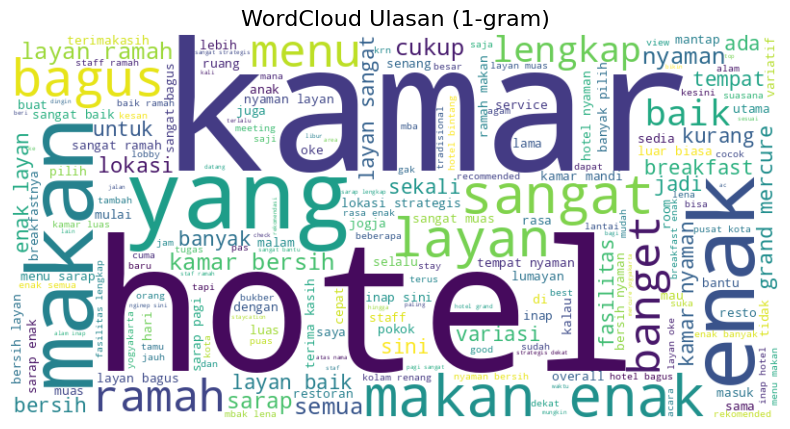

In [60]:
# N-Gram
show_wordcloud(all_words, "WordCloud Ulasan", 1)

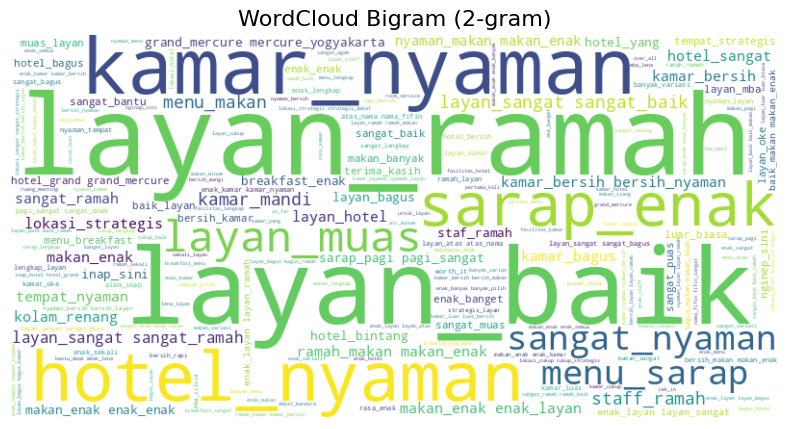

In [61]:
# Bigram
show_wordcloud(all_words, "WordCloud Bigram", 2)

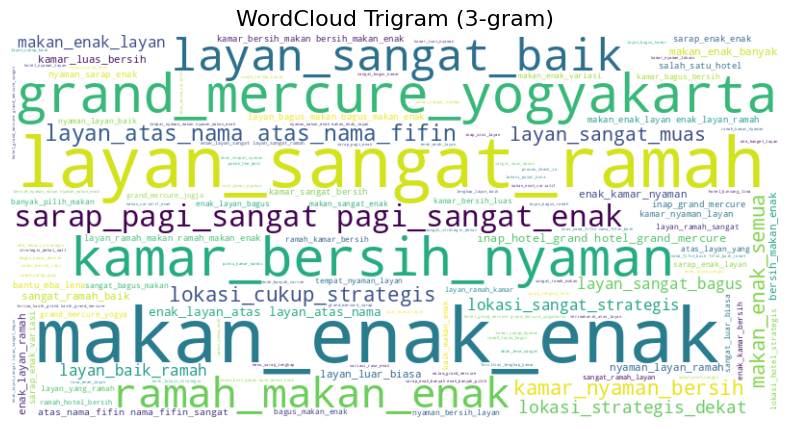

In [62]:
# Trigram
show_wordcloud(all_words, "WordCloud Trigram", 3)

In [64]:
df[['review', 'token']].to_csv("final.csv", index=False, encoding="utf-8-sig")
print("\File hasil preprocessing disimpan sebagai: 'final.csv'")

\File hasil preprocessing disimpan sebagai: 'final.csv'


<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
/tmp/ipython-input-1808921722.py:2: SyntaxWarning: invalid escape sequence '\F'
  print("\File hasil preprocessing disimpan sebagai: 'final.csv'")
